## Analiza danych english stack exchange

In [1]:
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")
sc.install_pypi_package("pandas==0.25.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1674392809000_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…



You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [2]:
# zainstalowane biblioteki
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
click (8.1.1)
cycler (0.11.0)
docutils (0.14)
jmespath (1.0.0)
joblib (1.1.0)
kiwisolver (1.4.4)
lockfile (0.11.0)
lxml (4.8.0)
matplotlib (3.1.1)
mysqlclient (1.4.2)
nltk (3.7)
nose (1.3.4)
numpy (1.20.0)
pandas (0.25.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.9)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2022.1)
PyYAML (5.4.1)
regex (2021.11.10)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.63.1)
typing-extensions (4.4.0)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
You are using pip version 9.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [3]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
spark = SparkSession.builder.appName("english_stack_exchange_analysis").getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### liczba postow na przestrzeni czasu

In [ ]:
df_posts = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/posts.parquet")

In [6]:
df_posts_history = df_posts.groupBy(F.to_date("creation_date").alias("creation_date")).count()\
                           .orderBy(F.col("creation_date").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
# dodatkowa kolumna do agregacji danych po miesiacach - czytelniejszy wykres
df_posts = df_posts.withColumn("creation_date_month", F.trunc("creation_date", "month"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
df_posts_history_monthly = df_posts.groupBy(F.to_date("creation_date_month").alias("creation_date_month")).count()\
                                   .orderBy(F.col("creation_date_month").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
pd_df_posts_history_monthly = df_posts_history_monthly.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

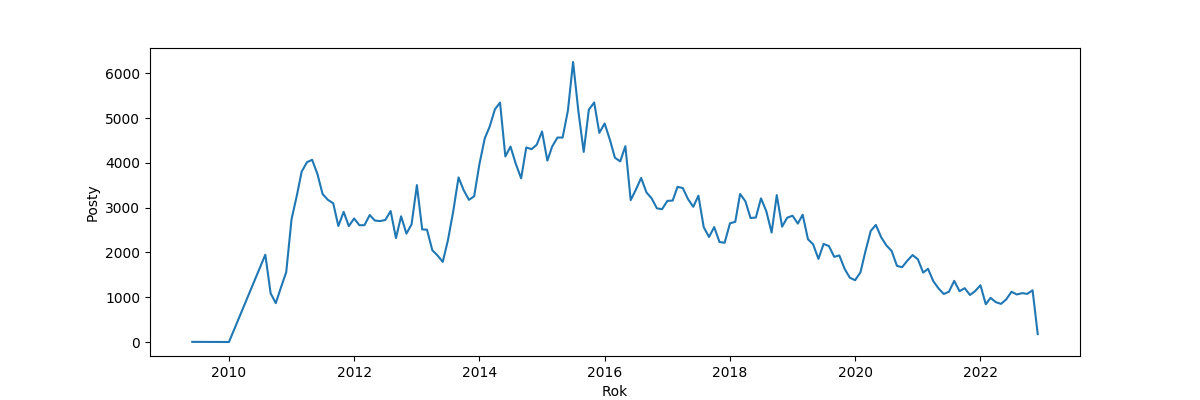

In [10]:
posts = pd_df_posts_history_monthly["count"]
labels_posts = pd_df_posts_history_monthly["creation_date_month"]

plt.clf()
plt.plot(labels_posts, posts)
fig = plt.gcf()
fig.set_size_inches(12, 4)

Size = fig.get_size_inches()
# plt.title('Posty na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Posty')
%matplot plt

#### nowe konta na przestrzeni czasu

In [11]:
df_users = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/users.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
df_users = df_users.withColumn("creation_date_month", F.trunc("creation_date", "month"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
df_users_history_monthly = df_users.groupBy(F.to_date("creation_date_month").alias("creation_date_month")).count()\
                                   .orderBy(F.col("creation_date_month").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
pd_df_users_history_monthly = df_users_history_monthly.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

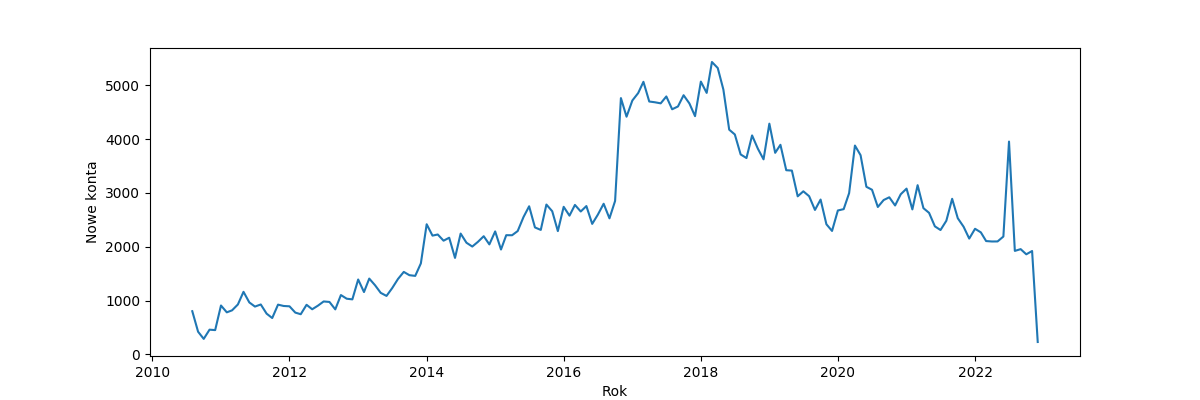

In [16]:
users = pd_df_users_history_monthly["count"]
labels_users = pd_df_users_history_monthly["creation_date_month"]

plt.clf()
plt.plot(labels_users, users)
fig = plt.gcf()
fig.set_size_inches(12, 4)

Size = fig.get_size_inches()
# plt.title('Posty na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Nowe konta')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

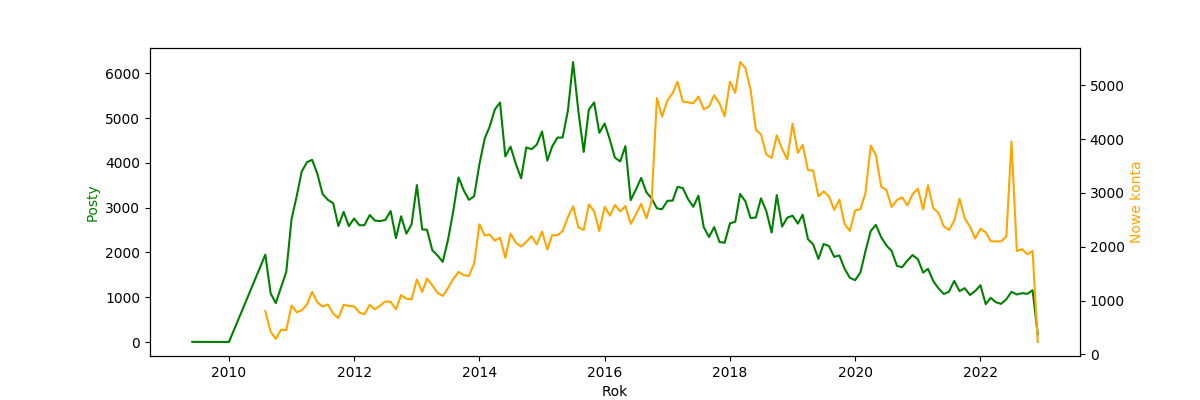

In [17]:
# nowe konta i posty na przestrzeni calego analizowanego okresu
plt.clf()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(labels_posts, posts, color='g')
ax2.plot(labels_users, users, color='orange')
fig.set_size_inches(12, 4)

ax1.set_xlabel('Rok')
ax1.set_ylabel('Posty', color='g')
ax2.set_ylabel('Nowe konta', color='orange')

%matplot plt

#### top tagow

In [18]:
df_tags = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/tags.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# top 15 najpopularniejszych
df_tags_top = df_tags.orderBy(F.col("count").desc()).limit(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df_tags_top = df_tags_top.orderBy(F.col("count").asc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
pd_df_tags_top = df_tags_top["tag_name", "count"].toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

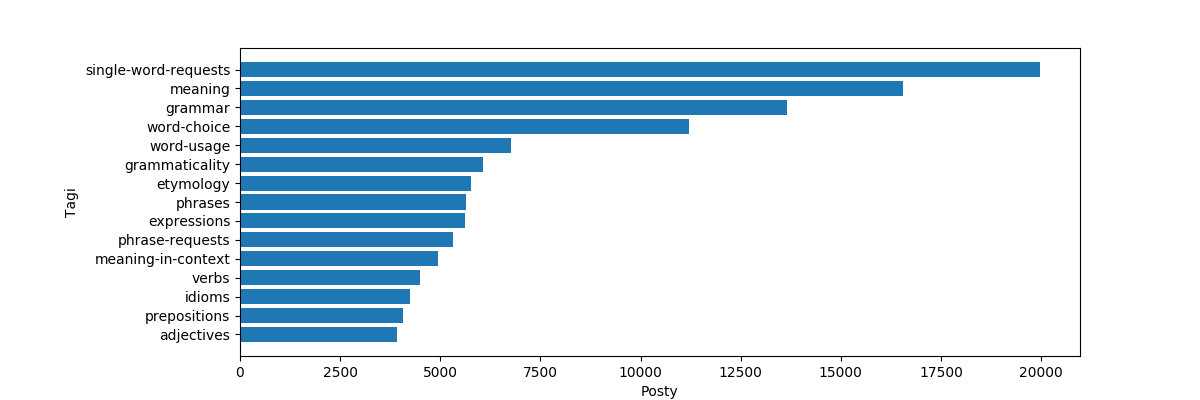

In [22]:
posts = pd_df_tags_top["count"]
labels = pd_df_tags_top["tag_name"]

plt.clf()
plt.barh(labels, posts, align='center')
fig = plt.gcf()
Size = fig.get_size_inches()
# fig.set_size_inches(8, 7, True)
fig.set_size_inches(12, 4)
plt.subplots_adjust(left=0.2)
# plt.title('Historycznie najpopularniejsze tagi - top 15')
plt.xlabel('Posty')
plt.ylabel('Tagi')
%matplot plt

In [24]:
# utrzenie nowe pole z podzielonymi tagami do dalszej analizy
df_posts.select('tags', F.split(F.regexp_replace(F.col('tags'), "^<|>$", ""), "><").alias('tags_split'))\
        .show(4, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0--------------------------------------------------------------------
 tags       | null                                                           
 tags_split | null                                                           
-RECORD 1--------------------------------------------------------------------
 tags       | <meaning><phrases><expressions><phrase-requests><phrase-usage> 
 tags_split | [meaning, phrases, expressions, phrase-requests, phrase-usage] 
-RECORD 2--------------------------------------------------------------------
 tags       | null                                                           
 tags_split | null                                                           
-RECORD 3--------------------------------------------------------------------
 tags       | <grammar><pronouns><whom><who>                                 
 tags_split | [grammar, pronouns, whom, who]                                 
only showing top 4 rows

In [25]:
df_posts = df_posts.withColumn("tags_split", F.split(F.regexp_replace(F.col('tags'), "^<|>$", ""), "><"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
exploded_posts_tags = df_posts.select(F.to_date("creation_date").alias("creation_date"), F.explode("tags_split").alias("tag"))
                              .groupBy(F.col("creation_date"), F.col("tag"))\
                              .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
df_tags_top = df_tags.orderBy(F.col("count").desc()).limit(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
top_tags_list = [i[0] for i in df_tags_top.select("tag_name").collect()]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
top_tag_posts = exploded_posts_tags.filter(F.col("tag").isin(top_tags_list))\
                                   .orderBy(F.col("creation_date").desc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
top_tag_posts.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------+--------------------+-----+
|creation_date|                 tag|count|
+-------------+--------------------+-----+
|   2022-12-04|             grammar|    4|
|   2022-12-04|             meaning|    1|
|   2022-12-04|          word-usage|    1|
|   2022-12-04|single-word-requests|    1|
|   2022-12-03|         word-choice|    1|
|   2022-12-03|          word-usage|    1|
|   2022-12-03|             grammar|    5|
|   2022-12-03|             meaning|    2|
|   2022-12-03|single-word-requests|    3|
|   2022-12-02|          word-usage|    2|
|   2022-12-02|             grammar|    4|
|   2022-12-02|single-word-requests|    2|
|   2022-12-02|             meaning|    2|
|   2022-12-01|single-word-requests|    1|
|   2022-12-01|             grammar|    2|
|   2022-12-01|             meaning|    5|
|   2022-12-01|         word-choice|    2|
|   2022-11-30|             grammar|    3|
|   2022-11-30|          word-usage|    1|
|   2022-11-30|             meaning|    1|
+----------

In [32]:
# top 5 najpopularniejszych tagow
top_tag_posts.groupBy("tag").sum("count").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+
|                 tag|sum(count)|
+--------------------+----------+
|          word-usage|      6772|
|single-word-requests|     19971|
|         word-choice|     11205|
|             meaning|     16544|
|             grammar|     13661|
+--------------------+----------+

In [33]:
# najpopularniejsze 15 tagow w tabeli posts dla porownania, dane sie zgadzaja
df_tags.orderBy(F.col("count").desc()).show(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------------------+-----+---------------+------------+
| id|            tag_name|count|excerpt_post_id|wiki_post_id|
+---+--------------------+-----+---------------+------------+
|326|single-word-requests|19971|          14097|       14096|
| 54|             meaning|16544|           3294|        3293|
|  7|             grammar|13661|          14043|       14042|
|125|         word-choice|11205|          14099|       14098|
|658|          word-usage| 6772|          31769|       31768|
|344|      grammaticality| 6073|          11093|       11092|
|  2|           etymology| 5772|           2880|        2879|
|334|             phrases| 5650|          13025|       13024|
|297|         expressions| 5620|          18219|       18218|
|651|     phrase-requests| 5320|          33984|       33983|
|648|  meaning-in-context| 4953|          21052|       21051|
|273|               verbs| 4504|           3530|        3529|
|295|              idioms| 4239|          18035|       18034|
|287|   

In [34]:
pd_df_top_tag_posts = top_tag_posts.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
top_tag_posts = top_tag_posts.withColumn("creation_year", F.year(F.col("creation_date")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
pd_pivoted_top_tag_posts = top_tag_posts.groupBy(F.col("creation_year"))\
                                        .pivot("tag").sum("count")\
                                        .sort(F.col("creation_year").asc())\
                                        .toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

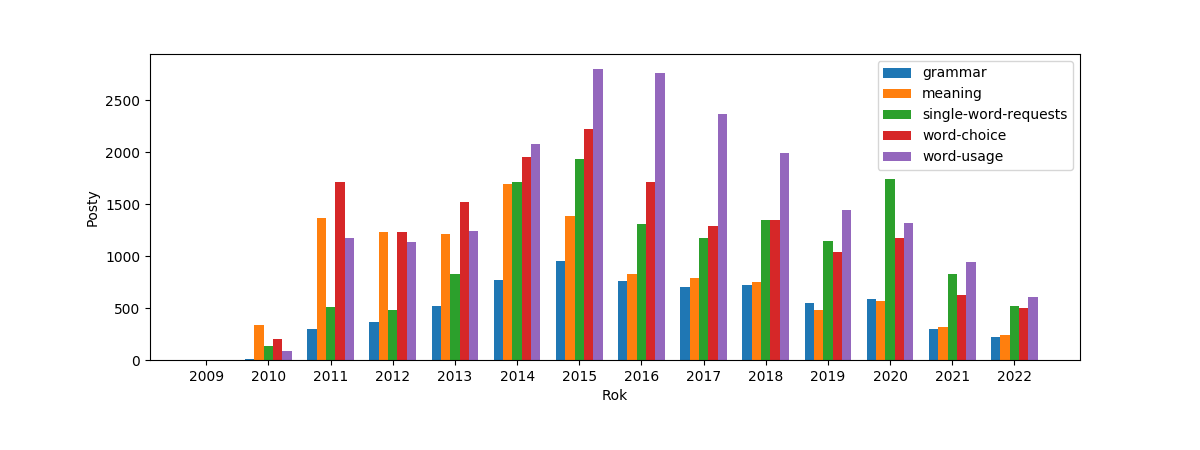

In [40]:
# najpopularniejsze 5 tagow w przekroju na lata
plt.clf()

labels = pd_pivoted_top_tag_posts['creation_year']
grammar = pd_pivoted_top_tag_posts['grammar']
meaning = pd_pivoted_top_tag_posts['meaning']
single_word_requests = pd_pivoted_top_tag_posts['single-word-requests']
word_choice = pd_pivoted_top_tag_posts['word-choice']
word_usage = pd_pivoted_top_tag_posts['word-usage']


x = np.arange(len(labels))

width = 0.15

fig, ax = plt.subplots()

rects1 = ax.bar(x - 0.3, pd_pivoted_top_tag_posts['word-usage'], width, label='word-usage')
rects2 = ax.bar(x - 0.15, pd_pivoted_top_tag_posts['word-choice'], width, label='word-choice')
rects3 = ax.bar(x, pd_pivoted_top_tag_posts['grammar'], width, label='grammar')
rects4 = ax.bar(x + 0.15, pd_pivoted_top_tag_posts['meaning'], width, label='meaning')
rects5 = ax.bar(x + 0.3, pd_pivoted_top_tag_posts['single-word-requests'], width, label='single-word-requests')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend(["grammar", "meaning", "single-word-requests", "word-choice", "word-usage"])
fig.set_size_inches(12, 4.5)
plt.subplots_adjust(bottom=0.2)
# plt.title('Posty na przestrzeni lat w przekroju na najpopularniejsze tagi - top 5')
plt.xlabel('Rok')
plt.ylabel('Posty')
plt.savefig('top_5_most_popular_tags_in_time.png')
%matplot plt

#### najpopularniejsze tagi, od 2019 roku

In [41]:
exploded_posts_tags = df_posts.filter((F.to_date("creation_date")>="2022-01-01") & (F.to_date("creation_date")<="2022-12-31")).select(F.to_date("creation_date").alias("creation_date"), F.explode("tags_split").alias("tag")).groupBy(F.col("creation_date"), F.col("tag")).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
top_tags_since_2019 = exploded_posts_tags.groupBy(F.col("tag")).sum("count")
top_tags_since_2019 = top_tags_since_2019.withColumnRenamed("sum(count)", "sum")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
top_tags_since_2019.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---+
|                 tag|sum|
+--------------------+---+
|          word-usage|221|
|               colon| 13|
|            religion|  3|
|          technology| 13|
|early-modern-english|  9|
|    transitive-verbs|  7|
|             analogy|  3|
|              simile|  6|
|  progressive-aspect|  4|
|prepositional-phr...| 25|
|             russian|  4|
|           disjuncts|  2|
| scientific-language|  8|
| expression-requests| 15|
|            who-that|  1|
|            alphabet|  3|
|  compound-sentences|  4|
|         agent-nouns|  1|
|   compound-subjects|  5|
|       whiz-deletion|  3|
+--------------------+---+
only showing top 20 rows

In [44]:
top_10_tags_since_2019 = top_tags_since_2019.orderBy(F.col("sum").desc()).limit(15)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
pd_df_top_tags_since_2019 = top_10_tags_since_2019.orderBy(F.col("sum").asc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

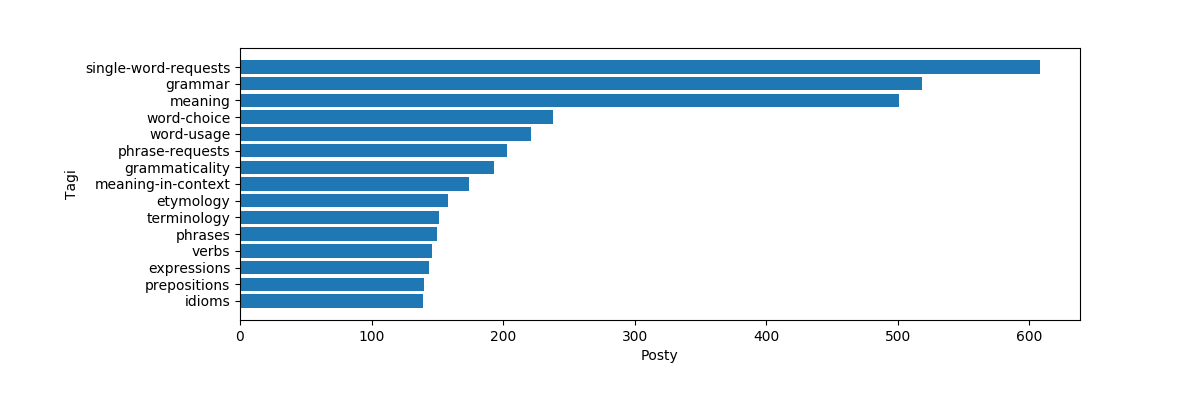

In [46]:
posts = pd_df_top_tags_since_2019["sum"]
labels = pd_df_top_tags_since_2019["tag"]

plt.clf()
plt.barh(labels, posts, align='center')
fig = plt.gcf()
Size = fig.get_size_inches()
# fig.set_size_inches(8, 7, True)
fig.set_size_inches(12, 4)
plt.subplots_adjust(left=0.2)
# plt.title('Historycznie najpopularniejsze tagi - top 15')
plt.xlabel('Posty')
plt.ylabel('Tagi')
%matplot plt

#### czas na forum

In [47]:
df_users = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/users.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
df_users = df_users.withColumn("time_on_forum_in_seconds", F.col("last_access_date").cast("long") - F.col("creation_date").cast("long"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
# nie wykorzystano w pracy
df_users.orderBy(F.col("time_on_forum_in_seconds").desc()).show(5, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### najwyzej i najnizej oceniane pytania

In [51]:
df_posts = spark.read.parquet("s3://english-stackexchange-com/parquet/2023-01-19/posts.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
df_posts.select("title", "score", "tags")\
        .filter(F.col("post_type_id") == 1)\
        .sort(F.col("score").desc())\
        .show(10, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0----------------------------------------------------------------------------------------
 title | How do you quote a passage that has used '[sic]' mistakenly?                            
 score | 620                                                                                     
 tags  | <punctuation><quotations>                                                               
-RECORD 1----------------------------------------------------------------------------------------
 title | Did English ever have a formal version of "you"?                                        
 score | 432                                                                                     
 tags  | <etymology><pronouns><formality><personal-pronouns><thou-thee-thy>                      
-RECORD 2----------------------------------------------------------------------------------------
 title | Which word begins with "y" and looks like an axe in this picture?                       
 score | 426        

In [53]:
df_posts.select("title", "score")\
        .filter(F.col("post_type_id") == 1)\
        .sort(F.col("score").asc())\
        .show(5, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0--------------------------------------------------------------------------
 title | How to comprehend the phrase "put them in affluent group of people"       
 score | -11                                                                       
-RECORD 1--------------------------------------------------------------------------
 title | Why does English have so few "obscene" roots, compared to Russian?        
 score | -10                                                                       
-RECORD 2--------------------------------------------------------------------------
 title | Word for “Woman Who Hates Men”                                            
 score | -10                                                                       
-RECORD 3--------------------------------------------------------------------------
 title | How do you say "make a stack from a pile of sheets of paper" in one word? 
 score | -9                                                                 

#### historycznie najpopularniejsze pytania (najwięcej wyświetleń)

In [92]:
df_posts.select("title", "view_count", "tags")\
        .filter(F.col("post_type_id") == 1)\
        .sort(F.col("view_count").desc())\
        .show(10, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0------------------------------------------------------------------------------------------------------------
 title      | What is the *best* way to express that an email contains an attachment?                                
 view_count | 2313084                                                                                                
 tags       | <formality><email>                                                                                     
-RECORD 1------------------------------------------------------------------------------------------------------------
 title      | Is it "bear" or "bare" with me?                                                                        
 view_count | 1862608                                                                                                
 tags       | <word-choice><homophones>                                                                              
-RECORD 2-----------------------------------------------

#### zaakceptowane vs niezaakceptowane odpowiedzi

In [54]:
# nie wykorzystano
df_posts.filter((F.col("post_type_id") == 1) & F.col("accepted_answer_id").isNull()).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

66329

In [55]:
df_posts.filter((F.col("post_type_id") == 1) & F.col("accepted_answer_id").isNotNull()).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

60801

In [56]:
df_posts.filter((F.col("post_type_id") == 1)).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

127130

#### najbardziej komentowane

In [95]:
# nie wykorzystano
df_posts.select("title", "comment_count", "tags")\
        .filter(F.col("post_type_id") == 1)\
        .sort(F.col("comment_count").desc())\
        .show(10, truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0-----------------------------------------------------------------------------------------------------------------------
 title         | Does a "fact" have to be true?                                                                                 
 comment_count | 69                                                                                                             
 tags          | <meaning><ambiguity>                                                                                           
-RECORD 1-----------------------------------------------------------------------------------------------------------------------
 title         | A stronger word than "snob"                                                                                    
 comment_count | 51                                                                                                             
 tags          | <single-word-requests><expressions><vocabulary><pejorative-language><epithet-req